# Adaptive PDE discretizations on Cartesian grids
## Volume : Divergence form PDEs
## Part : Primal-Dual optimization
## Chapter : The mincut problem

$$
\def\cF{\mathcal{F}}
\def\cO{\mathcal{O}}
\def\cL{\mathcal{L}}
\def\bE{\mathbb{E}}
\def\bR{\mathbb{R}}
\def\bT{\mathbb{T}}
\def\vp{\varphi}
\def\diff{\mathrm{d}}
\def\sm{\setminus}
\DeclareMathOperator\TV{TV}
\DeclareMathOperator\Area{Area}
\DeclareMathOperator\prox{prox}
\DeclareMathOperator\proj{proj}
\DeclareMathOperator*\argmin{argmin}
\DeclareMathOperator\diver{div}
\DeclareMathOperator\sign{sign}
\def\Id{\mathrm{Id}}
\def\<{\langle}
\def\>{\rangle}
$$

The objective of this notebook is to numerically solve the *mincut* geometric optimization problem associated with an anisotropic metric, using Chambolle-Pock primal-dual optimization method.

### The mincut problem
Let $\Omega \subset \bR^d$ be a domain. In this notebook, $\Omega$ is box shaped, generally two-dimensional, and equipped with reflected boundary conditions. Denote by $\cF_x(v)$ a metric on a domain $\Omega$, and let $g : \Omega \to \bR$ be a bias cost function. 

The mincut problem asks for the minimizer $\vp : \Omega \to \bR$ of the following convex functional
$$
    E(\vp) := \int_\Omega \Big( \cF_x(\nabla \vp(x)) + g(x)\vp(x) \Big) \diff x,
$$
subject to the constraint $-1 \leq \vp \leq 1$ on $\Omega$ (or sometimes equivalently $0\leq \vp \leq 1$).

**Geometric variant.**
Consider the minimization of the following functional, related to the surface area
$$
    \mathbf E(\Phi) := \int_{\partial \Phi} \cF_x(n_{\Phi}(x)) \diff \sigma(x) + \int_\Phi g(x) \diff x
$$
among all (rectifiable) subsets $\Phi \subset \bT$, where $n_{\Phi}$ denotes the outward normal.

Using the co-area formula, one can show under adequate assumptions that $\vp : \bT \to \bR$ is a minimizer of $\TV_\cF$ iff for almost every $-1<t<1$ the sublevel set $\Phi := \{x \in \bT| \vp(x) \leq t\}$ is a minimizer of $\Area_\cF$.

**Comparison with existing work.**
The continuous mincut problem has been extensively studied in the special case where $\cF_x(v) = \lambda |v|$ is a constant multiple of the Euclidean norm. (A multichannel variant known as the relaxed Potts model is also well studied.) Up to rescaling $g$ we may assume that $\lambda=1$, and the only degree of freedom in the classical approach is thus the value $g(x)$ at each $x\in \Omega$. 

In this notebook, we investigate the relevance of non-constant and anisotropic metrics for the mincut problem. 
Depending on the choice of structure, we have up to $d(d+1)/2+d+d$ additional degrees of freedom per pixel to describe our objective functional ($7$ if $d=2$, and $12$ if $d=3$). 

We acknowledge that too many parameters can make a model difficult to use. 
However, they have here a natural geometric intepretation (Riemannian metric, etc), and a number of tools describing the local geometry of images can be leveraged to tune them.

**Lagrangian, and dual problem**

The mincut problem can be reformulated as :
$$
    \inf_{-1 \leq \vp \leq 1} \sup_{\cF^*_x(\eta(x)) \leq 1} \cL(\vp,\eta) := 
    \int_\Omega \Big(\<\nabla\vp(x),\eta(x)\> + g(x) \vp(x)\Big) \diff x.
$$

Interverting the inf-sup we obtain the dual problem of minimizing 
$$
    -E^*(\eta) := \int_\Omega |\diver \eta(x) - g(x)| \diff x,
$$
subject to the constraint $\cF^*_x(\eta(x)) \leq 1$ at each $x \in \Omega$. 

**Chambolle-Pock primal-dual optimization algorithm**

The numerical solution of 
$$
    \inf_{x\in X} \sup_{y \in Y} \<K x,y\> + F(x)-G^*(y),
$$
can be addressed with the algorithm
\begin{align*}
    x^{n+1}&:=\prox_{\sigma F}(x^n+\sigma K^\top y^n),\\
    \overline x^{n+1}&:=2 x^{n+1} - x^n,\\
    y^{n+1}&:=\prox_{\tau G^*}(y^n - \tau K \overline x^{n+1}),
\end{align*}
where the proximal time steps $\sigma,\tau > 0$ are subject to the compatibility condition $\sigma \tau \|K\|^2 \leq 1$. This basic algorithm admits a number of variants. 

Under suitable assumptions, the pair $(x^n,y^n)$ converges to a saddle point of the Lagrangian, and the  primal-dual gap goes to zero. Recall that this gap is defined as 
$$
    E(x) + E^*(y)
$$
where 
\begin{align*}
    E(x) &:= F(x)+G(K x),\\
    E^*(y) &:= -(F^*(-K^\top y)+G^*(y)).
\end{align*}

*Reference:* Chambolle, A. & Pock, T. On the ergodic convergence rates of a first-order primal--dual algorithm. Mathematical Programming 159, 253–287 (2016).
  
*Overrelaxation:* This algorithm also has an optional overrelaxation parameter `ρ_overrelax`$\in [1,2]$, which cuts the number of iterations in half in the best case, but also often causes some instabilities, especially if strongly anisotropic metrics are used. 

**Specialization to the mincut problem**

Denoting $\vp := x$ and $\eta := y$, and denoting by $\chi_{P(x)}$ the characteristic function of some property $P(x)$, we have 
\begin{align*}
    F(\vp) &:= \int_\Omega \big(g(x) \vp(x) + \chi_{-1\leq \vp(x) \leq 1}\big) \diff x,\\
    G^*(\eta) &:= \int_\Omega  \chi_{\cF_x^*(\eta(x)) \leq 1} \diff x.
\end{align*}
The proximal operators associated to functions these are essentially projections. The primal and dual energies $E$ and $E^*$ are given above.

[**Summary**](Summary.ipynb) of volume Divergence form PDEs, this series of notebooks.

[**Main summary**](../Summary.ipynb) of the Adaptive Grid Discretizations 
	book of notebooks, including the other volumes.

# Table of contents
  * [1. Implementation of the proximal operators](#1.-Implementation-of-the-proximal-operators)
    * [1.1 Projection onto the unit ball of the metric](#1.1-Projection-onto-the-unit-ball-of-the-metric)
    * [1.2 Second proximal operator](#1.2-Second-proximal-operator)
  * [2. Staggered grid](#2.-Staggered-grid)
    * [2.1 Grid layout and dimensions](#2.1-Grid-layout-and-dimensions)
    * [2.2 Gradient operators](#2.2-Gradient-operators)
    * [2.3 Divergence](#2.3-Divergence)
    * [2.4 Primal and dual energies](#2.4-Primal-and-dual-energies)
  * [3. One dimension](#3.-One-dimension)
    * [3.1 Variable metric, vanishing ground cost](#3.1-Variable-metric,-vanishing-ground-cost)
    * [3.2 Constant metric, variable ground cost](#3.2-Constant-metric,-variable-ground-cost)
  * [4. Two dimensions](#4.-Two-dimensions)
    * [4.1 Variable metric, vanishing ground cost](#4.1-Variable-metric,-vanishing-ground-cost)
    * [4.2 Constant metric, variable ground cost](#4.2-Constant-metric,-variable-ground-cost)
  * [5. Choice of metric](#5.-Choice-of-metric)
    * [5.1 Filtering](#5.1-Filtering)
    * [5.2 Isotropic metric](#5.2-Isotropic-metric)
    * [5.3 Riemannian metric](#5.3-Riemannian-metric)
    * [5.4 Randers metric](#5.4-Randers-metric)
    * [5.5 Randers metric via divergence](#5.5-Randers-metric-via-divergence)
    * [5.6 Asymmetric quadratic metrics](#5.6-Asymmetric-quadratic-metrics)



**Acknowledgement.** Some of the experiments presented in these notebooks are part of 
ongoing research with Ludovic Métivier and Da Chen.

Copyright Jean-Marie Mirebeau, Centre Borelli, ENS Paris-Saclay, CNRS, University Paris-Saclay

## 0. Importing the required libraries

In [1]:
import sys; sys.path.insert(0,"..") # Allow import of agd from parent directory (useless conda package is installed)

In [2]:
from agd import AutomaticDifferentiation as ad
import numpy as np; xp=np
from agd.Eikonal.HFM_CUDA import MinCut
from agd.ODE import proximal
from scipy.ndimage import gaussian_filter

In [3]:
norm = ad.Optimization.norm
from agd import Metrics
from agd import LinearParallel as lp
from agd import Plotting

In [4]:
from matplotlib import pyplot as plt 
from collections import OrderedDict

### 0.1 Additional configuration

The notebook presents a step by step CPU implementation of the numerical solution of the mincut problem.
We also propose an optimized GPU implementation, which is considerably faster for large test cases (CUDA gpu required).

The GPU implementation can also address three dimensional problem instances (not demonstrated in this notebook).

Uncomment the following line to use the gpu implementation.

In [5]:
#import cupy as xp

The CPU and GPU implementations are meant to be consistent up to machine precision. The following method checks this property.

In [6]:
def compare_cpu_gpu(data_cpu,maxiter=4,data_gpu=None):
    if xp is np: return # No GPU available
    res_cpu = mincut_cpu(*data_cpu,maxiter=maxiter,E_rtol=0) # Run on the cpu #ρ_overrelax=None

    # Run on the gpu
    (g,metric,dx,gradname) = data_cpu if data_gpu is None else data_gpu 
    res_gpu = MinCut.mincut(g,metric,dx,maxiter=maxiter,E_rtol=0,grad=gradname)

    # Compare the results
    ops,tmp = res_cpu['ops'],res_cpu['tmp']
    E_primal,E_dual = ops['E_primal'],ops['E_dual']
    def norminf(a): return np.max(np.abs(a))
    print("ϕ max error : ",norminf(res_gpu["ϕ"].get()-res_cpu['x']))
    print("η max error : ",norminf(res_gpu["η"].get()-res_cpu['y']))
    print(f"primal vals. GPU={res_gpu['primal_values'][-1]}, CPU={E_primal(tmp['x_'])}")
    print(f"dual vals. GPU={res_gpu['dual_values'][-1]}, CPU={E_dual(tmp['yold'])}")

    tols={'rtol':1e-5,'atol':1e-5}; 
    assert np.allclose(res_gpu['dual_values'][-1],E_dual(tmp['yold']),**tols)
    assert np.allclose(res_gpu['primal_values'][-1],E_primal(tmp["x_"]),**tols)
    assert np.allclose(res_gpu["ϕ"].get(),res_cpu['x'],**tols)
    assert np.allclose(res_gpu["η"].get(),res_cpu['y'],**tols)

## 1. Implementation of the proximal operators

### 1.1 Projection onto the unit ball of the metric

The optimization problem of interest involves the function
$$
    G^*(\eta) := \int_\Omega g^*_x(\eta(x)) \diff x.
$$
where $g^*_x(\eta) := \chi_{\cF_x^*(\eta) \leq 1}$ is the characteristic function of the unit ball $B^*$ of the dual metric $\cF^*$. Thanks to the separable structure of $G^*$, the proximal operator (and the dual function) can be computed pointwise.

The proximal operator $\prox_{\tau G^*}$ is obtained pointwise as the orthogonal projection onto the dual unit ball $B^*$, for any $\tau>0$.
For the geometries of interest (isotropic, Riemannian, asymmetric quadratic), this projection can be efficiently computed, and is implemented in the agd library. (The solution involves some root finding using a one-dimensional Newton method.)

In [7]:
aX = np.linspace(-2,2,20)
X = np.array(np.meshgrid(aX,aX,indexing='ij'))

In [8]:
def illustrate_proj(x,metric):
    proj = metric.make_proj_dual()
    
    plt.axis('equal'); plt.title(f"Projection, {metric.model_HFM()}")
    plt.quiver(*x,*(proj(x)-x),angles='xy',scale_units='xy',scale=1)
    
    plt.contour(*x,metric.dual().norm(x),levels=[1],colors=['red'])
    plt.scatter(*(0,0),color='black')

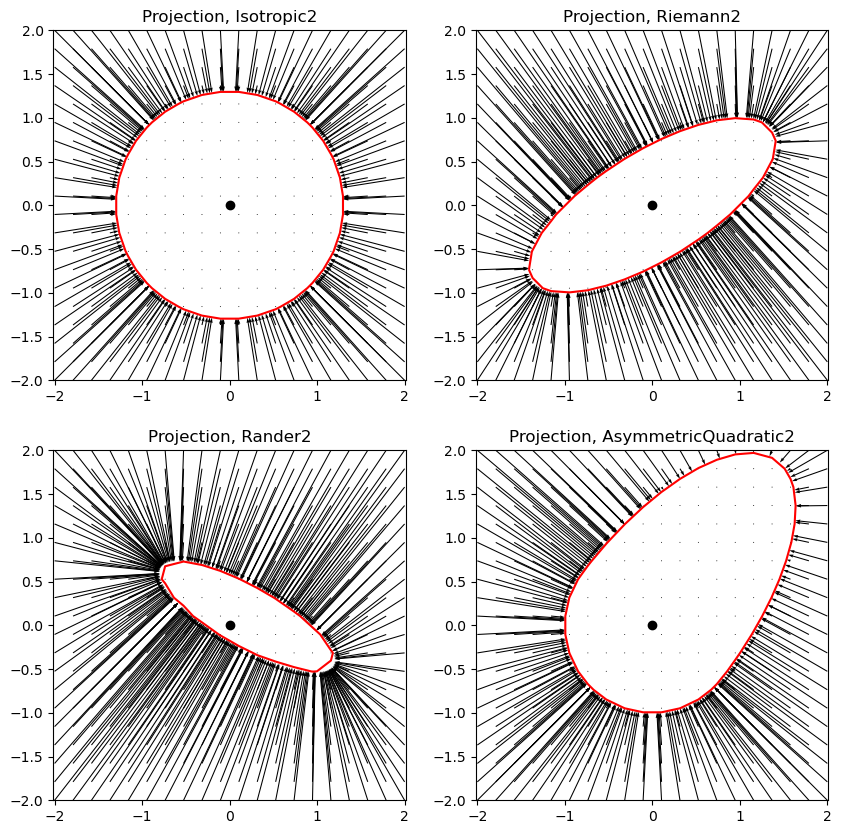

In [9]:
fig = plt.figure(figsize=[10,10])
metrics = [Metrics.Isotropic(1.3,vdim=2),Metrics.Riemann([[2.,1.],[1.,1.]]),
           Metrics.Rander([[1.,-0.5],[-0.5,0.4]],[0.2,0.1]),Metrics.AsymQuad([[1.,0],[0,1]],[1.3,1.7])]
for i,metric in enumerate(metrics):
    plt.subplot(2,2,i+1)
    illustrate_proj(X,metric)

While we're at it, we also implement $G^*$ and $G$. As already observed
$$
    G(\sigma) = \int_\Omega \cF_x(\sigma(x)) \diff x,
$$
is the integral of the norm of the vector field $\sigma$.

In [10]:
def make_Gs(metric):
    """Implementation of the constraint G(η) the characteristic function of the constraint
    F_x^*(η(x)) <= 1 for all x, and its dual and prox"""
    proj = metric.make_proj_dual()
    def Gs(η): return 0. # Gs:=G^* will only be evaluated inside its domain
    def G(σ):  return metric.norm(σ).sum()
    def prox_Gs(η,τ=1.): return proj(η)
    return Gs,G,prox_Gs

### 1.2 Second proximal operator

The function 
$$
    f(\vp) := \int_\Omega \Big(g(x) \vp(x) + \chi_{-1 \leq \vp(x) \leq 1}\Big) \diff x
$$
is separable like $g$. 
Again, thanks to the separable structure of $F$, we can compute the proximal operator (and dual function) pointwise.

Note that the dual to $\chi_{[-1,1]}$ is the absolute value function, whereas the corresponding proximal operator is the projection onto $[-1,1]$. The linear term introduces a shift in these operators, see the implementations below.

While we're at it, we also implement $F$ and $F^*$. 

In [11]:
def make_F(g):
    def F(ϕ):  return np.sum(g*ϕ) # Only evaluated inside its domain
    def Fs(ψ): return np.sum(np.abs(ψ-g))
    def prox_F(ϕ,τ): return np.maximum(-1.,np.minimum(1.,ϕ-τ*g))
    return F,Fs,prox_F

## 2. Staggered grid

Computations occur on a staggered grid. Vectors are stored at the cell centers, and function values at the cell corners.

The basic identity for estimating the operator norm of the gradient operator is 
$$
    \big(\frac{\vp(x+h)-\vp(x)} {h}\big)^2 \leq 2 h^{-2} \big(\vp(x)^2 + \vp(x+h)^2\big).
$$
From this point, one obtains for various discretizations with grid scale $h=(h_1,\cdots,h_d)$, that
$$
    \|\nabla_h\|^2 = \|\diver_h\|^2 \leq 4 \sum_{1 \leq i \leq d} h_i^{-2}.
$$

In [12]:
def norm2_grad(dx,gradname):
    """Squared norm of the discrete gradient operator"""
    assert np.ndim(dx)==1 # One grid scale per axis
    res = 4*(dx**-2).sum()
    return (res/2) if gradname=='grad2' else res

### 2.1 Grid layout and dimensions

The domain is discretized using two grids : 
- a cell centered grid $X_m$ used for quantities related with the metric, vector fields, etc
- a vertex centered one $X_\vp$, used for the level set function.

<!---
(Note: For the discretizations `gradb` and `gradt` considered below, this estimate is actually slightly violated due to the introduction of weights on a boundary layer. We ignore this detail, which raises no numerical issue.)

The grid $X_\phi$ has an additional layer of points. For consistency, we introduce weights when computing integrals on $X_\phi$, so that the total mass of the domain is independent of the chosen grid. 

Our mincut solver uses reflected boundary conditions.

For consistent numerical integration, the edges should be counted with half weight, and the corners with 1/4 weight, in two dimensions. The following function returns the weights, as sparse matrix based implementations of the gradient and negative divergence. (In pure Python, this is usually more efficient than finite differences.)


def stag_weights(shape,xp=np):
    """
    Integration weights for the standard grid, consistent with reflected boundary conditions.
    In two dimensions : 1 in the interior, 1/2 one edges, 1/4 on corners.
    """
    weights = xp.ones(shape)
    for i in range(len(shape)): 
        weights[(slice(None),)*i + ( 0,)]*=0.5
        weights[(slice(None),)*i + (-1,)]*=0.5
    return weights
    
    
weights = stag_weights(Xϕ[0].shape)
weights



def grad_ndiv_operators(grad,dx,weights):
    """
    Gradient and negative divergence operators, sparse matrix based implementation.
    (Turns a programmatic implementation of a linear function into a sparse matrix implementation,
    which respects the shapes of the inputs and outputs. Also transposes.)
    Input : 
    - grad : gradient implementation, usually finite differences based.
    - dx : grid scale
    - weights : integration weights for self adjointness, in the potential domain.
    Output : (grad, ndiv) functions
    """
    shape = weights.shape
    size = weights.size
    shape_grad = grad(weights,dx).shape
    ϕ_ad = ad.Sparse.identity(shape)
    grad_ = ad.array(grad(ϕ_ad,dx)).tangent_operator(size)
    ndiv_ = ad.array(grad(ϕ_ad/weights,dx)).adjoint_operator(size) # Cautious about scalar product
    def grad(ϕ): return (grad_*ϕ.reshape(-1)).reshape(shape_grad)
    def ndiv(η): return (ndiv_*η.reshape(-1)).reshape(shape)
    grad.T=ndiv; ndiv.T=grad
    return grad, ndiv

We introduce some weights in the summation of $F$, related to the treatment of the boundary conditions, see the next section.

def make_F(g,weights):
    def F(ϕ):  return (g*ϕ*weights).sum() # Only evaluated inside its domain
    def Fs(ψ): return (np.abs(ψ-g)*weights).sum()
    def prox_F(ϕ,τ): return np.maximum(-1.,np.minimum(1.,ϕ-τ*g))
    return F,Fs,prox_F
--->

In [13]:
shape = (7,8)
Xϕ,Xm,dx = MinCut.stag_grids(shape,[[-1,-1],[1,1]]) 

The variable `dx` contains the grid scales along each axis.

In [14]:
dx

array([0.33333333, 0.28571429])

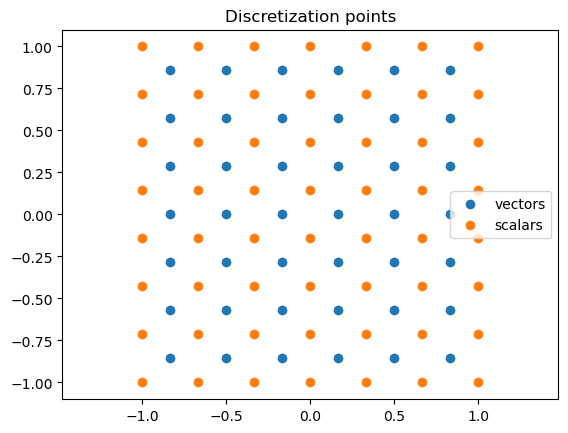

In [15]:
plt.title("Discretization points"); plt.axis('equal')
plt.scatter(*Xm,label="vectors")
plt.scatter(*Xϕ,label="scalars")
plt.legend();

### 2.2 Gradient operators

We use standard, axis aligned finite differences to discretize the gradient. For that purpose, we introduce an utility function.

In [16]:
def drop(arr,n,axis=0): 
    """
    Drop the first or last elements of an array, along the chosen axis.
    - n : number of elements to drop. If n<0 then drop from the end.
    - axis : index of the axis along which to drop.
    """
    sl = slice(n,None) if n>=0 else slice(0,n)
    if axis<0: axis += arr.ndim
    return arr[(slice(None),)*axis+(sl,)]

In one dimension, there is a single obvious way to discretize the gradient operator.

In [17]:
def grad1(ϕ,dx): return (drop(ϕ,1)-drop(ϕ,-1))[None]/dx

There are several ways to discretize a two dimensional gradient operator, in a cell centered grid, with grid scale $h$. 

We can use upwind finite differences from the bottom corner:
$$
    \nabla_h^b u(x,y) := ( \frac{u(x+h,y)-u(x,y)} h, \frac {u(x,y+h)-u(x,y)} h)
$$
Alternatively, downwind finite differences from the top corner:
$$
    \nabla_h^t u(x,y) := ( \frac{u(x+h,y+h)-u(x,y+h)} h, \frac {u(x+h,y+h)-u(x+h,y)} h)
$$

In [18]:
def gradb(ϕ,dx): return ad.array([drop(drop(ϕ, 1,i)-drop(ϕ,-1,i),-1,1-i)/dxi for i,dxi in enumerate(dx)])
def gradt(ϕ,dx): return ad.array([drop(drop(ϕ, 1,i)-drop(ϕ,-1,i), 1,1-i)/dxi for i,dxi in enumerate(dx)])

Both $\nabla_h^b$ and $\nabla_h^t$ use non-centered finite differences. In order improve accuracy, one option is to average them, defining:
$$
    \nabla^c_h u := \frac 1 2 (\nabla^b_h u + \nabla^t_h u)
$$
One easily obtains that for smooth $u$
$$
    \nabla_h^b u(x) = \nabla u(x)+\cO(h), \quad 
    \nabla_h^t u(x) = \nabla u(x)+\cO(h), \quad 
    \nabla_h^c u(x) = \nabla u(x)+\cO(h^2).
$$

In [19]:
def gradc(ϕ,dx): return 0.5*(gradb(ϕ,dx)+gradt(ϕ,dx))

Unfortunately, $\nabla^c_h$ vanishes on chessboard patterns, which leads to chessboard artifacts in numerical simulations.

In [20]:
chessboard = (np.arange(shape[0])[:,None]+np.arange(shape[1])[None])%2
print(chessboard)
assert np.allclose( gradc(chessboard+0.,dx), 0) # The chessboard pattern lies in the kernel of gradc

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


Another option is to keep both $\nabla^b_h$ and $\nabla^t_h$. If $f$ and $u$ are a smooth functions, then a symmetry argument shows that 
$$
    \tfrac 1 2 (f(\nabla^b_h u) + f(\nabla^t_h u)) = f(\nabla u) + \cO(h^2).
$$
Thus second order accuracy is recovered, and the chessboard pattern is not in the opertor kernel anymore.

In [21]:
def grad2(ϕ,dx): return 0.5*np.stack([gradb(ϕ,dx), gradt(ϕ,dx)],axis=1)

### 2.3 Divergence

The negative divergence is obtained as the transposed operator to the gradient.
We implement both using sparse matrices, which can be faster than finite differences in Python. 

In [22]:
def grad_ndiv_operators(grad,dx,shape):
    """
    Gradient and negative divergence operators, sparse matrix based implementation.
    (Turns a programmatic implementation of a linear function into a sparse matrix implementation,
    which respects the shapes of the inputs and outputs. Also transposes.)
    Input : 
    - grad : gradient implementation, usually finite differences based.
    - dx : grid scale.
    - shape : shape of the potential domain.
    Output : (grad, ndiv) functions
    """
    ϕ_ad = ad.Sparse.identity(shape)
    grad_ad = ad.array(grad(ϕ_ad,dx))
    shape_grad = grad_ad.shape
    grad_ = grad_ad.tangent_operator(ϕ_ad.size)
    ndiv_ = grad_ad.adjoint_operator(ϕ_ad.size)
    def grad(ϕ): return (grad_*ϕ.reshape(-1)).reshape(shape_grad)
    def ndiv(η): return (ndiv_*η.reshape(-1)).reshape(shape)
    grad.T=ndiv; ndiv.T=grad
    return grad, ndiv

In [23]:
np.random.seed(42)
shape = (7,8)
for grad_ in (gradb,gradc,grad2):
    grad,ndiv = grad_ndiv_operators(grad_,dx,shape)
    ϕ = np.random.rand(*shape)
    η = np.random.rand(*grad(ϕ).shape)
    
    # Check that sparse matrix implementation is faithful
    assert np.allclose(grad(ϕ),grad_(ϕ,dx))
    # Check adjointness of gradient and negative divergence, with weight matrix
    assert np.allclose( (grad(ϕ)*η).sum(), (ϕ*ndiv(η)).sum() )

### 2.4 Primal and dual energies

The primal-dual gap is commonly used as a stopping criterion for the Chambolle-Pock optimization algorithm.
Note that the knowledge of this quantity is not strictly necessary, since other criteria can be considered as well, such as the convergence of the iterates, or simply the number of iterations.

<!---
Let us implement the primal energy of the mincut problem, and the dual energy which is related to the maxflow problem.

def make_Energies(g,metric,grad,dx):
    """
    Returns the primal and dual energies, and the duality gap.
    """
    weights = stag_weights(g.shape)
    grad,ndiv = grad_ndiv_operators(grad,dx,weights)

    def E_primal(ϕ): 
        """
        The primal energy of the mincut problem.
        Assumes -1 <= ϕ(x) <= 1 for all x. (Otherwise infinite.)
        """
        return metric.norm(grad(ϕ)).sum() + (ϕ*g*weights).sum()
    
    def E_dual(η):
        """
        The dual energy, related with the maxflow problem.
        Assumes F^*_x(η(x)) <= 1 for all x. (Otherwise infinite.)
        """
        return np.abs((ndiv(η)+g)*weights).sum()
    
    def gap(ϕ,η):
        """The duality gap."""
        return E_primal(ϕ)+E_dual(η) 
    
    return {'E_primal':E_primal,'E_dual':E_dual,'gap':gap,'grad':grad,'ndiv':ndiv,'weights':weights}

Note the admissibility constraints, $-1 \leq \vp(x) \leq 1$ and $\cF_x^*(\eta(x)) \leq 1$ for all $x\in \Omega$, are automatically satisfied by the iterates of the Chambolle-Pock primal-dual algorithm.
--->


**General expression.** In fact, the primal and dual energies can be expressed generally in the primal-dual saddle-point optimization setting 
$$
    \inf_x \sup_y \<K x,y\> + F(x) - G^*(y),
$$
as 
$$
    E(x) := F(x) + G(K x),
$$
and 
$$
    E^*(y) := -(F^*(-K^\top y) + G^*(y)).
$$

Thus it is enough to provide the implementations of $F,F^*,G^*,G$ and the linear operators $K$ and $K^\top$. In fact, we already implemented all of these methods.

## 3. One dimension

We illustrate and validate the mincut segmentation in one dimension.
Numerical applications are usually in higher dimension, of course, but the visualization and debugging is easier in one dimension.

### 3.1 Variable metric, vanishing ground cost

In this first experiment, the ground cost is vanishing except in the neighborhood of the center and of the interval boundary, which serve as source and sink regions. 

The cost function defining the metric varies however, and as a result the segmentation places the region interfaces exactly where their cost is minimal.

In [24]:
Xϕ,Xm,dx = MinCut.stag_grids((101,),[[-1],[1]]) 
Xm=Xm[0]; Xϕ=Xϕ[0] # Only one coordinate in dimension one
g = (np.abs(Xϕ)<=0.1) - (np.abs(Xϕ)>=0.9).astype(float)
metric = Metrics.Isotropic( 0.1*(1.+0.5*np.cos(2*np.pi*Xm)) )

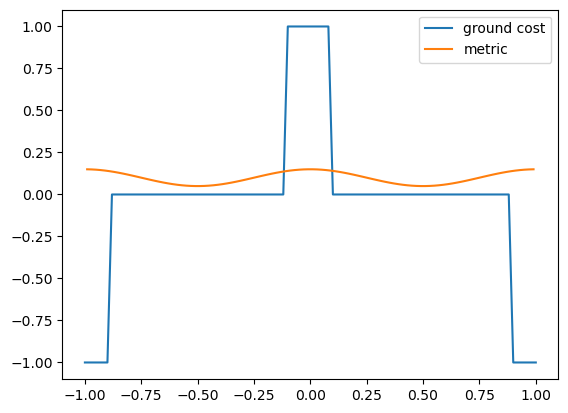

In [25]:
plt.plot(Xϕ,g,label="ground cost")
plt.plot(Xm,metric.cost,label="metric")
plt.legend();

Let us generate further input data needed for the Chambolle-Pock algorithm.

<!---
# Alternatively, τ_F = 0.2/np.max(np.abs(g)) 
--->

In [26]:
ϕ0 = np.zeros(g.shape) # Initial guess
grad,_ = grad_ndiv_operators(grad1,dx,g.shape) # Coupling operator

# Proximal operators
impl_F,impl_Gs = make_F(g),make_Gs(metric)
τ_F = 0.2 # Reasonnable defaults : 0.1 ... 1  
τ_Gs = 1./(τ_F*norm2_grad(dx,'grad1'))

In [27]:
res = proximal.chambolle_pock(impl_F,impl_Gs,τ_F,τ_Gs,grad,ϕ0)

Primal-dual solver completed 141 steps in 0.0032939910888671875 seconds


In [28]:
print(f"{res['primal_values'][-1]} <= energy <= {res['dual_values'][-1]}")

-11.974256301604695 <= energy <= -11.980267284282716


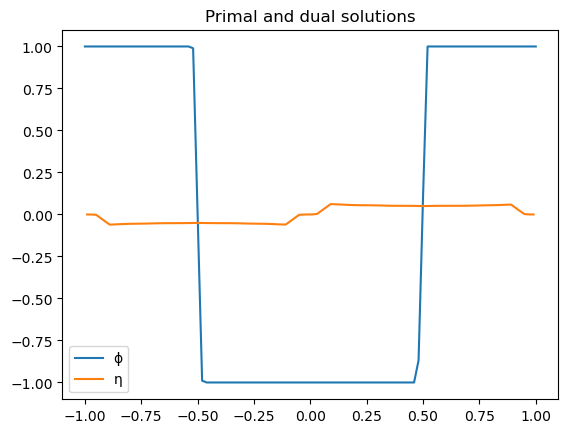

In [29]:
ϕ = res['x']; η = res['y']

plt.title("Primal and dual solutions")
plt.plot(Xϕ,ϕ,label='ϕ')
plt.plot(Xm,*η,label='η')
plt.legend();

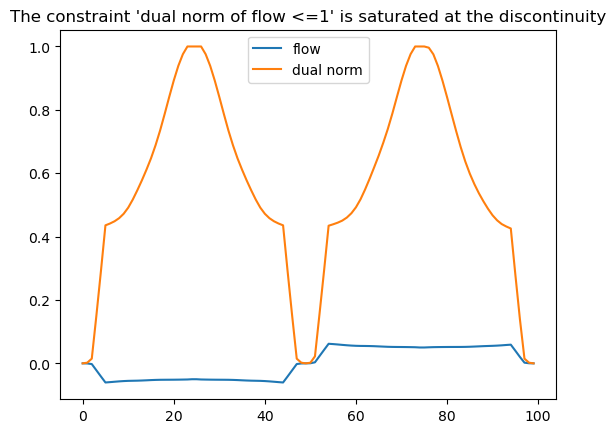

In [30]:
plt.title("The constraint 'dual norm of flow <=1' is saturated at the discontinuity")
plt.plot(η[0],label='flow')
plt.plot(metric.dual().norm(η),label='dual norm')
plt.legend();

The improvement of the primal-dual gap is not monotone along the iterations.

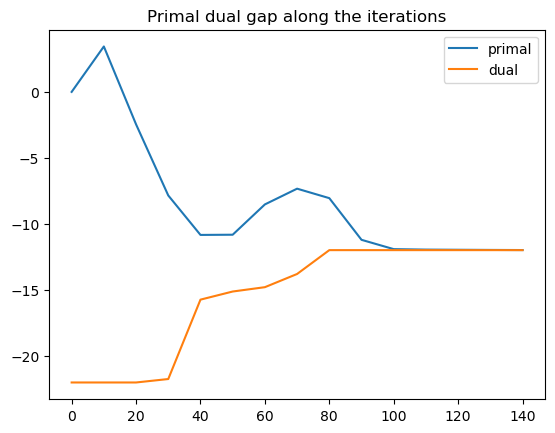

In [31]:
plt.title("Primal dual gap along the iterations")
niter = 10*np.arange(res['primal_values'].size)
plt.plot(niter,res['primal_values'],label='primal')
plt.plot(niter,res['dual_values'],label='dual')
plt.legend();

For convenience, we gather the preprocessing and the optimization in a method.

<!---
def mincut(g,metric,gradname,dx,τ_F=0.2,**kwargs):
    grad = {'grad1':grad1,'gradb':gradb,'gradt':gradt,'gradc':gradc,'grad2':grad2}[gradname]
    ops = make_Energies(g,metric,grad,dx)
    gap,grad = [ops[key] for key in ('gap','grad')]
    ϕ0 = np.zeros(g.shape)
    τ_Gs = 1./(τ_F*norm2_grad(dx,gradname))    
    res = proximal.chambolle_pock(make_prox_F(g),make_prox_Gs(metric),τ_F,τ_Gs,grad,ϕ0,**kwargs)
    return res,ops
--->

In [32]:
def mincut_cpu(g,metric,dx,gradname='gradb',τ_F=0.2,ρ_overrelax=1.8,**kwargs):
    if len(dx)==1: gradname='grad1'
    grad,_ = grad_ndiv_operators({'grad1':grad1,'gradb':gradb,'gradt':gradt,'gradc':gradc,'grad2':grad2}[gradname],dx,g.shape)
    ϕ0 = np.zeros(g.shape)
    τ_Gs = 1./(τ_F*norm2_grad(dx,gradname))    
    res = proximal.chambolle_pock(make_F(g),make_Gs(metric),τ_F,τ_Gs,grad,ϕ0,ρ_overrelax=ρ_overrelax,**kwargs)
    return {**res,'ϕ':res['x'],'η':res['y']}

In [33]:
def mincut_gpu(*args,**kwargs): return ad.cupy_generic.cupy_get(MinCut.mincut(*args,**kwargs),iterables=(dict,))

In [34]:
if xp is not np: mincut = mincut_gpu # Use gpu if available
else: mincut = mincut_cpu

In [35]:
compare_cpu_gpu((g,metric,dx,'grad1'))

### 3.2 Constant metric, variable ground cost

This is the most common usage setting in image segmentation.

In [36]:
Xϕ,Xm,dx = MinCut.stag_grids((201,),[[-1],[1]]) 
Xm=Xm[0]; Xϕ=Xϕ[0] # Only one coordinate in dimension one
g = np.cos(np.pi*Xϕ)
metric = Metrics.Isotropic(0.1,vdim=1) # Constant cost

In [37]:
res = mincut(g,metric,dx,'grad1')
assert res['niter']<1000 # Did not exhaust iteration budget

Primal-dual solver completed 131 steps in 0.0034780502319335938 seconds


In this example, we have one central region where the ground cost $g$ is positive.

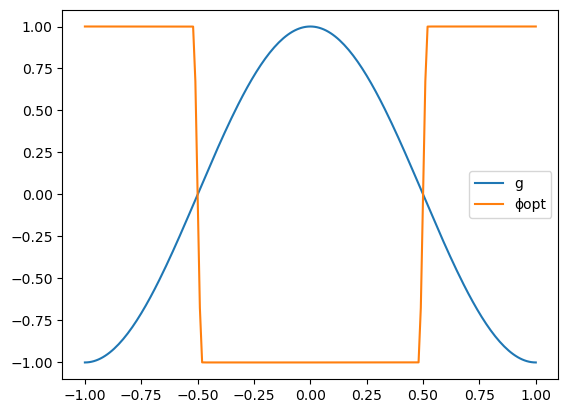

In [38]:
plt.plot(Xϕ,g,label="g")
plt.plot(Xϕ,res['ϕ'],label="ϕopt")
plt.legend();

We can add some perturbations to the ground cost function, and observe that the segmentation remains stable.

In [39]:
np.random.seed(40)
g_pert = g+(np.random.rand(*g.shape)-0.5)

Primal-dual solver completed 131 steps in 0.004191875457763672 seconds


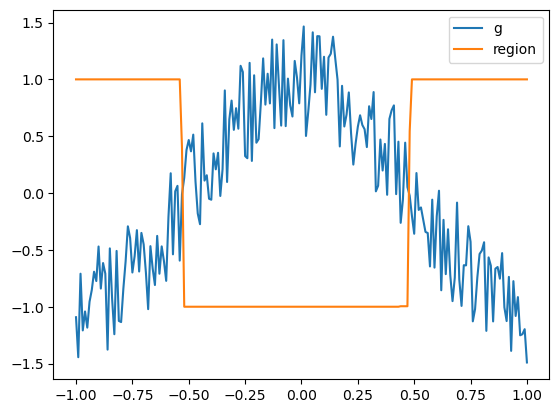

In [40]:
metric = Metrics.Isotropic(0.1,vdim=1) # Large cost of interfaces
res = mincut(g_pert,metric,dx,'grad1')

plt.plot(Xϕ,g_pert,label="g")
plt.plot(Xϕ,res['ϕ'],label="region")
plt.legend();

In [41]:
compare_cpu_gpu((g_pert,metric,dx,'grad1'))

If the cost of the region boundaries, which is defined by the metric, is too small, then additional interfaces can appear.

Primal-dual solver completed 41 steps in 0.001522064208984375 seconds


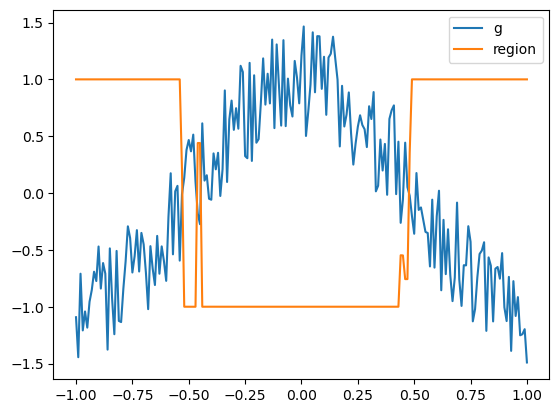

In [42]:
metric = Metrics.Isotropic(0.002,vdim=1) # Very small cost of interfaces
res = mincut(g_pert,metric,dx,'grad1')
plt.plot(Xϕ,g_pert,label="g")
plt.plot(Xϕ,res['ϕ'],label="region")
plt.legend();

## 4. Two dimensions

### 4.1 Variable metric, vanishing ground cost

We solve a minimal surface problem, whose solution is a circle.

<!---
res=mincut_gpu(g,metric,dx,maxiter=2600);
res=mincut_gpu(g,metric,dx,maxiter=2600);
res=mincut_gpu(g,metric,dx,maxiter=2600);

plt.contourf(*Xϕ,res['ϕ'].get())
plt.axis('equal');
--->

In [43]:
Xϕ,Xm,dx = MinCut.stag_grids((101,101),[[-1,-1],[1,1]])
r = np.linalg.norm(Xϕ,axis=0)
g = 10.*(r<=0.2) - (np.max(np.abs(Xϕ),axis=0)>=0.9)

#def cost0(r): return 0.05*(1.+0.5*np.cos(2*np.pi*r))
def cost0(r): return 0.05*(1+np.abs(r-0.5)) # Non differentiable. Also works
r = np.linalg.norm(Xm,axis=0)
metric = Metrics.Isotropic(cost0(r)/np.maximum(r,0.2))

The ground cost $g$ involves large positive values in the center, and negative values on the boundary, thus defining a source and a sink.

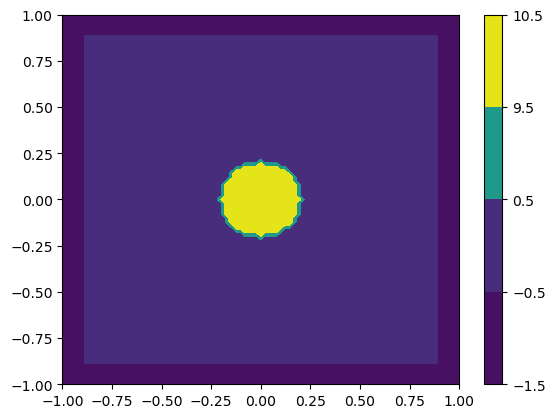

In [44]:
plt.contourf(*Xϕ,g,levels = [-1.5,-0.5,0.5,9.5,10.5])
plt.colorbar();

The metric is isotropic, with a cost function $\mathrm{cost}_0(r)$ varying radially and which is minimal at $r=0.5$.  

In the case where $\phi$ is the indicator function of a centered disk of radius $r\geq 0.2$, the cost of its interface is $2 \times 2 \pi\  \mathrm{cost}_0(r)$, where the first factor two is because we use the convention $-1\leq \vp \leq 1$ (rather than $0 \leq \vp \leq 1$).

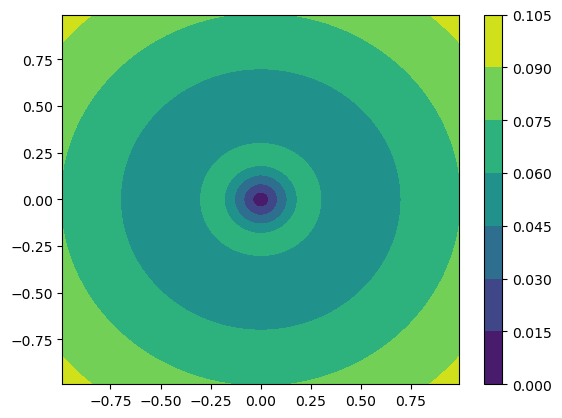

In [45]:
plt.contourf(*Xm,metric.cost*r)
plt.colorbar();

The exact energy of the optimal boundary is known in the continuous setting.

In [46]:
E_exact = 2*2*np.pi*cost0(0.5)

The problem is correctly solved by the numerical method, with all gradient discretizations, with comparable errors.
We find as expected that the optimal region is a disk of radius $0.5$. 

The most visually pleasing solution is obtained with the gradc centered scheme (thinnest boundary, best rotation invariance). However, we will see later that it suffers from chessboard artifact unstabilities in some contexts.

The gradc,gradt, and grad2 discretizations suffer from small artifacts, but nothing too serious. Second order accurate schemes,  gradc and grad2, do not provide a substantial advantage, which is not really surprising since the solution is not smooth anyway. 

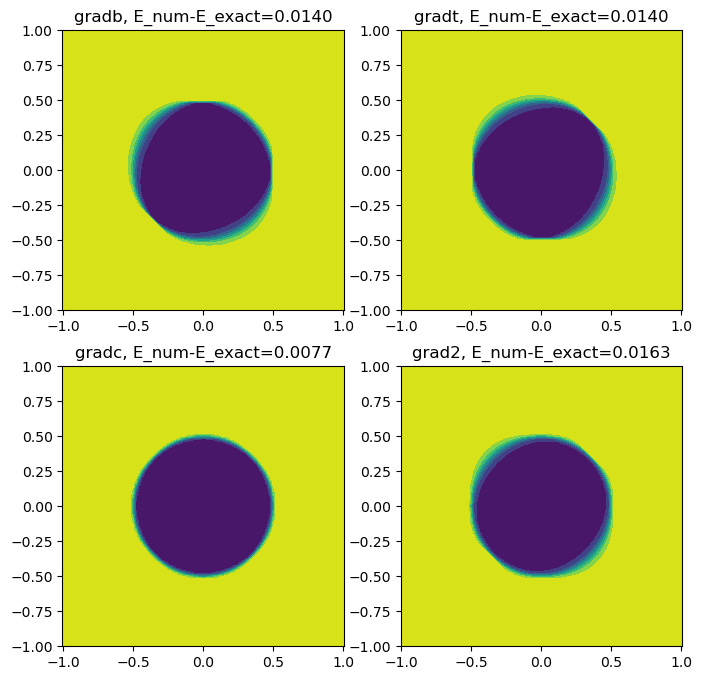

In [47]:
plt.figure(figsize=[8,8])
for i,gradname in enumerate(('gradb','gradt','gradc','grad2')):
    res = mincut_cpu(g,metric,dx,gradname,verbosity=1)
    
    # Compare the computed and the exact energy
    ϕ = res['ϕ']
    E_primal = res['ops']['E_primal']
    E_num = np.prod(dx)*(E_primal(ϕ) - np.sum(g*ϕ))
    
    plt.subplot(2,2,1+i)
    plt.title(f"{gradname}, {E_num-E_exact=:.4f}")
    plt.contourf(*Xϕ,ϕ)
    plt.axis('equal')

In [48]:
compare_cpu_gpu((g,metric,dx,'grad2'))

### 4.2 Constant metric, variable ground cost

We solve the mincut problem with a constant isotropic metric, and a ground cost which is a triangular geometric region. 


In [49]:
Xϕ,Xm,dx = MinCut.stag_grids((101,71),[[0,0],[1,0.7]])
g_sharp = ((Xϕ[0]>=0.15) & (Xϕ[1]>=0.15) & (Xϕ[0]+2*Xϕ[1]<=1.1)) | ((Xϕ[0]-0.7)**2+(Xϕ[1]-0.45)**2<=0.15**2)
g_sharp = 2*g_sharp-1

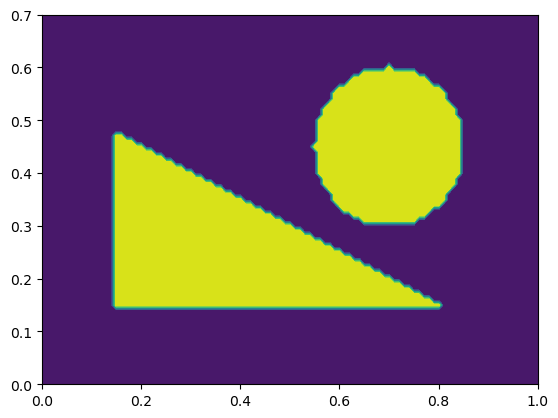

In [50]:
plt.contourf(*Xϕ,g_sharp);

The metric cost parameter acts as a regularization parameter. 
- When it is small, the shape is almost untouched. 
- For medium values, the corners of the shape are smoothed. 
- For large values, the shape shrinks and finally diappears.

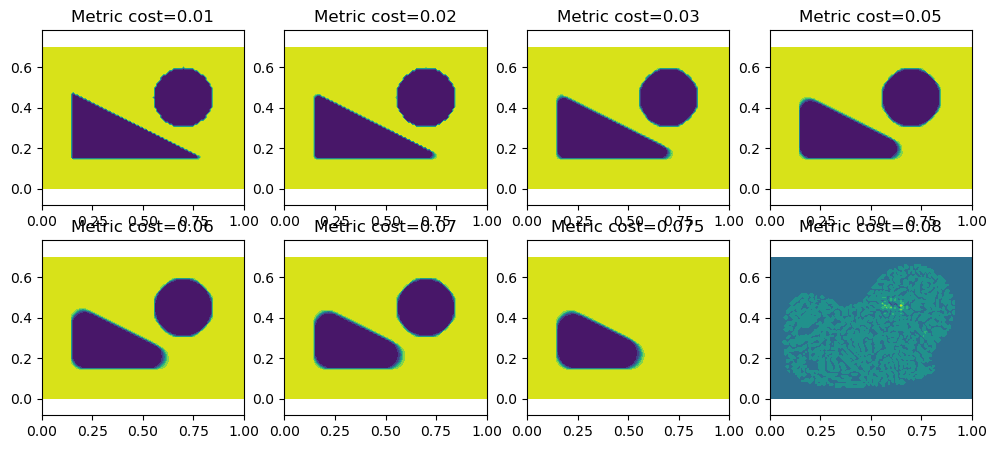

In [51]:
plt.figure(figsize=[12,5])
for i,cost in enumerate([0.01,0.02,0.03,0.05,0.06,0.07,0.075,0.08]):
    metric = Metrics.Isotropic(cost,vdim=2)
    res = mincut(g_sharp,metric,dx,'gradc',verbosity=1)
    plt.subplot(2,4,1+i)
    plt.title(f"Metric {cost=}") 
    plt.axis('equal')
    plt.contourf(*Xϕ,res['ϕ'])

Let us add some salt and pepper noise to this image.

In [52]:
np.random.seed(42)
ρ = 0.7 # Proportion of pixels that are modified
r = np.random.rand(*g_sharp.shape)
g_noisy = np.where(r<ρ, np.sign(r-ρ/2), g_sharp)

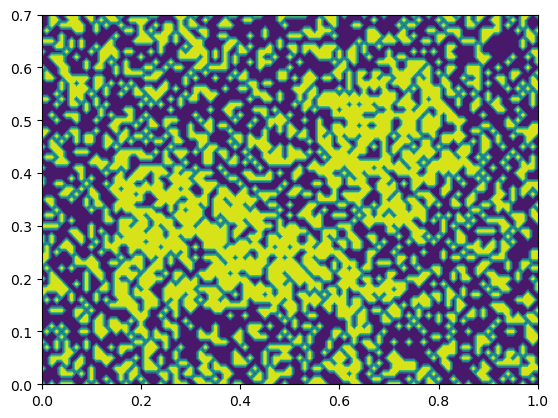

In [53]:
plt.contourf(*Xϕ,g_noisy);

**Chessboard artifacts.** 
We see large regions with obvious chessboard artifacts with the centered gradc scheme, as we expected.

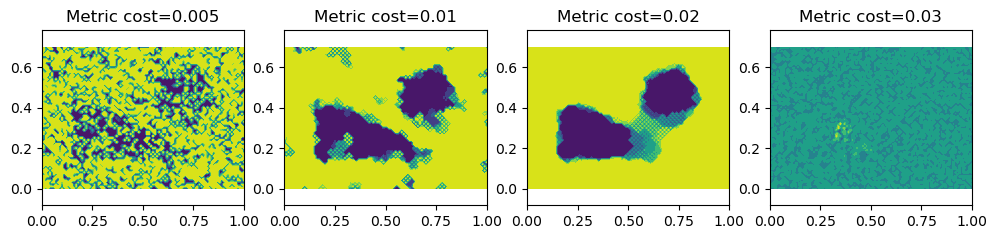

In [54]:
plt.figure(figsize=[12,5])
for i,cost in enumerate([0.005,0.01,0.02,0.03]):
    metric = Metrics.Isotropic(cost,vdim=2)
    res = mincut(g_noisy,metric,dx,'gradc',verbosity=1)
    plt.subplot(2,4,1+i)
    plt.title(f"Metric {cost=}") 
    plt.axis('equal')
    plt.contourf(*Xϕ,res['ϕ'])

The chessboard artifact problem is solved by using another gradient scheme.

Again, the metric cost acts as a regularizer. 
- For small values, the noise remains.
- For medium values, the shape is more or less recovered. 
- For large values, the penalization of the perimeter is too strong, and all data is lost.

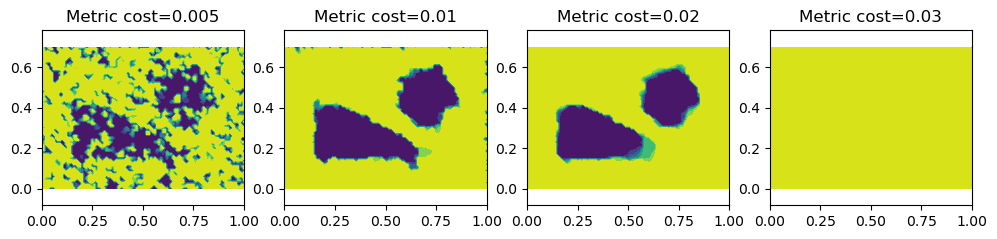

In [55]:
plt.figure(figsize=[12,5])
for i,cost in enumerate([0.005,0.01,0.02,0.03]):
    metric = Metrics.Isotropic(cost,vdim=2)
    res = mincut(g_noisy,metric,dx,'gradb',verbosity=1)
    plt.subplot(2,4,1+i)
    plt.title(f"Metric {cost=}") 
    plt.axis('equal')
    plt.contourf(*Xϕ,res['ϕ'])

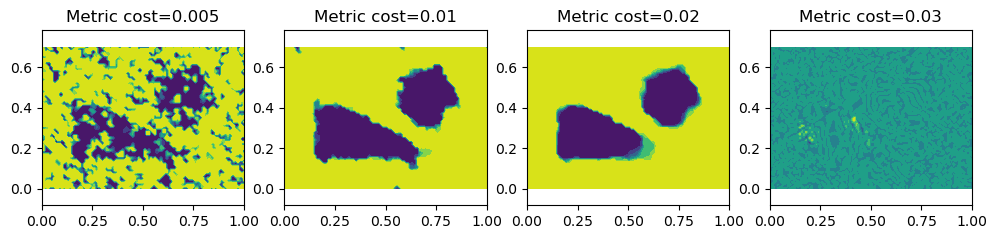

In [56]:
plt.figure(figsize=[12,5])
for i,cost in enumerate([0.005,0.01,0.02,0.03]):
    metric = Metrics.Isotropic(cost,vdim=2)
    res = mincut(g_noisy,metric,dx,'grad2',verbosity=1)
    plt.subplot(2,4,1+i)
    plt.title(f"Metric {cost=}") 
    plt.axis('equal')
    plt.contourf(*Xϕ,res['ϕ'])

In [57]:
compare_cpu_gpu((g_noisy,Metrics.Isotropic(0.01,vdim=2),dx,'grad2'))

## 5. Choice of metric

We continue with the previous example, and try to introduce some geometry to help the shape recovery.

### 5.1 Filtering

Il order to approximately locate the boundaries of the region, and their orientation, we rely on a classical construction based on convolutions and known as the structure tensor. 
$$
    S := K_\rho * (\nabla u_\sigma \nabla u_\sigma^\top), \quad u_\sigma := K_\sigma * u,
$$
where $\rho$ denotes the feature scale, $\sigma$ denotes the noise scale, and $K_\sigma$ is a Gaussian convolution kernel of variance $\sigma^2$.

More sophisticated edge detectors, possibly based on learning, could be considered as well.


*Note*: salt and peper noise actually has no scale.

In [58]:
def structure_tensor(g,noise_scale=3.,feature_scale=4.): # scales in pixels
    # Interpolate on the staggered grid, used for geometric data
    g = (g[:-1,:-1]+g[1:,:-1]+g[:-1,1:]+g[1:,1:])/4.
    
    # Smoothed gradient
    gx = gaussian_filter(g,noise_scale,[1,0])
    gy = gaussian_filter(g,noise_scale,[0,1])
    
    # Structure tensor
    gxx = gaussian_filter(gx**2,feature_scale)
    gxy = gaussian_filter(gx*gy,feature_scale)
    gyy = gaussian_filter(gy**2,feature_scale)
    
    # Similarly smoothed gradient (for Randers metrics)
    gx = gaussian_filter(gx,feature_scale)
    gy = gaussian_filter(gy,feature_scale)

    return (gx,gy),(gxx,gxy,gyy)

In [59]:
(gx,gy),(gxx,gxy,gyy) = structure_tensor(g_noisy)

### 5.2 Isotropic metric

The trace of the structure tensor is obtained as 
$$
    \mathrm{Tr}(S) = K_\rho * (\|\nabla u_\sigma\|^2).
$$
This defines a reasonable edge detector.

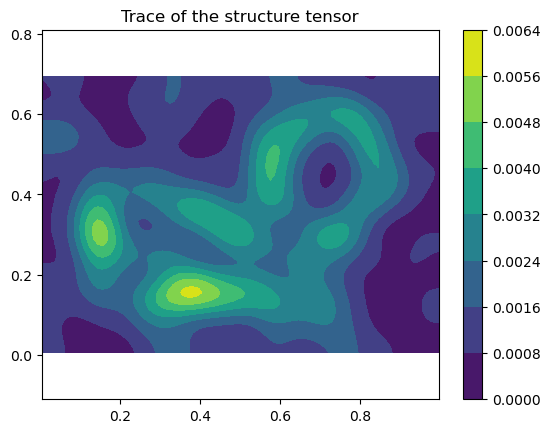

In [60]:
plt.title("Trace of the structure tensor")
plt.contourf(*Xm,gxx+gyy)
plt.axis('equal')
plt.colorbar();

In [61]:
edge_detect = gxx+gyy
edge_detect = np.maximum(np.max(edge_detect)/5.,edge_detect) # Avoid excessive contrast.
edge_cost = np.min(edge_detect)/edge_detect # rescale in [0,1], inverse
metric = Metrics.Isotropic(edge_cost)

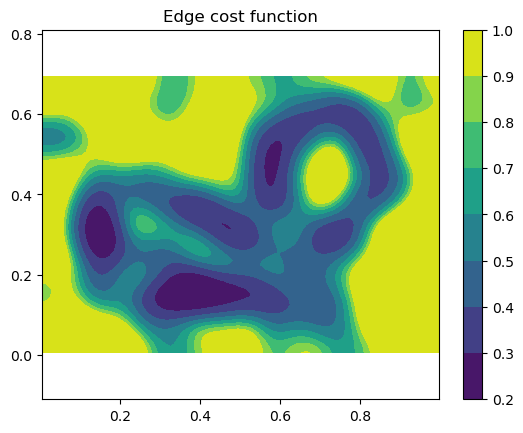

In [62]:
plt.contourf(*Xm,edge_cost) 
plt.title("Edge cost function")
plt.axis('equal')
plt.colorbar();

Another way to visualize a metric is through Tissot's indicatrix, which is the collection of its unit balls. 
In this specific case, the unit balls are isotropic, but their radius vary accross the domain. Large unit balls mean that the cost of vectors is small. 

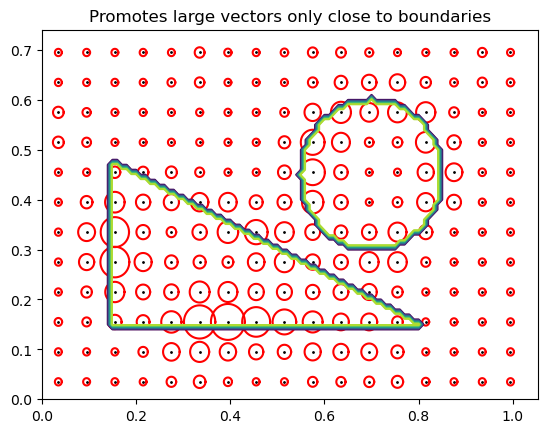

In [63]:
plt.title("Promotes large vectors only close to boundaries")
Plotting.Tissot(metric,Xm,subsampling=6,scale=-1.5)
plt.contour(*Xϕ,g_sharp);

The shapes are correctly recovered for a wider range of parameters than with the constant metric case.

However, the boundaries remain quite irregular, and the tip of the triangle is severely cut.

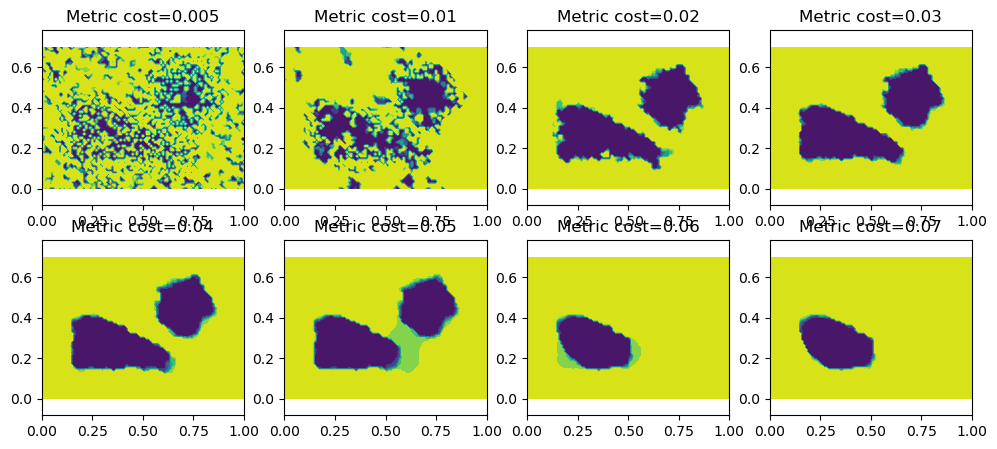

In [64]:
plt.figure(figsize=[12,5])
for i,cost in enumerate([0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07]):
    res = mincut(g_noisy,metric.with_cost(cost),dx,'grad2',verbosity=1)
    plt.subplot(2,4,1+i)
    plt.title(f"Metric {cost=}") 
    plt.axis('equal')
    plt.contourf(*Xϕ,res['ϕ'])

### 5.3 Riemannian metric 

The structure tensor $S(x)$ defines a positive (semi-definite) matrix. If the image has some discontinuity at a point $x$, with normal $S(x)$, then by construction $\<n(x),S(x) n(x)\> \gg 1$.

We use here the inverse structure tensor to define the metric cost, which satisfies $\<n(x),S(x)^{-1} n(x)\> \ll 1$, with some thresholding to ensure positive definiteness. More complex constructions could be considered, e.g. related to Weickert's structure enhancing and coherence enhancing tensors.

In [65]:
gmax = np.max(gxx+gyy)
S = np.array([[gxx,gxy],[gxy,gyy]]) / gmax # Normalized structure tensor

In [66]:
def mapping(λs): # How to map the eigenvalues of S
    λ1,λ2 = λs # λ1 <= λ2
    t = 0.05 # Threshold parameter
    μ1 = t/np.maximum(t,λ1)
    μ2 = t/np.maximum(t,λ2)
    return μ1,μ2

In [67]:
metric = Metrics.Riemann.from_mapped_eigenvalues(S,mapping)

In [68]:
print(f"Strongest anisotropy : {np.max(metric.anisotropy())}")

Strongest anisotropy : 4.3232615690643605


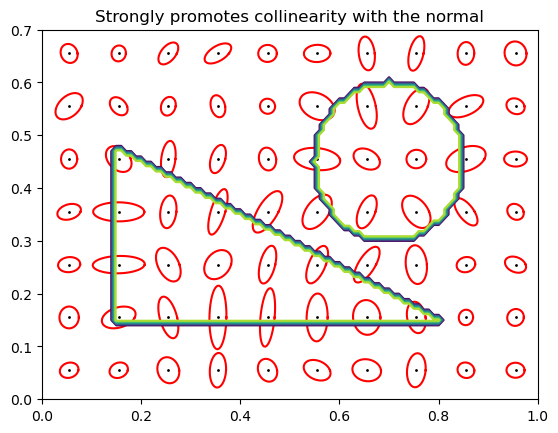

In [69]:
plt.title("Strongly promotes collinearity with the normal")
Plotting.Tissot(metric,Xm,subsampling=10,scale=-1.5)
plt.contour(*Xϕ,g_sharp);

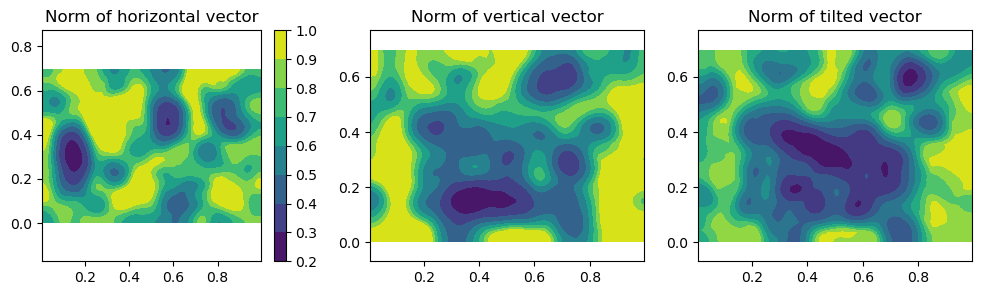

In [70]:
plt.figure(figsize=[12,3])
plt.subplot(1,3,1); plt.axis('equal'); plt.title("Norm of horizontal vector")
plt.contourf(*Xm,metric.norm([1,0]))
plt.colorbar()
plt.subplot(1,3,2); plt.axis('equal'); plt.title("Norm of vertical vector")
plt.contourf(*Xm,metric.norm([0,1]))
plt.subplot(1,3,3); plt.axis('equal'); plt.title("Norm of tilted vector")
plt.contourf(*Xm,metric.norm([1,2]));

We obtain reasonably sharp and rather smooth boundaries, which is an improvement. There are again a few checkerboard artifacts.

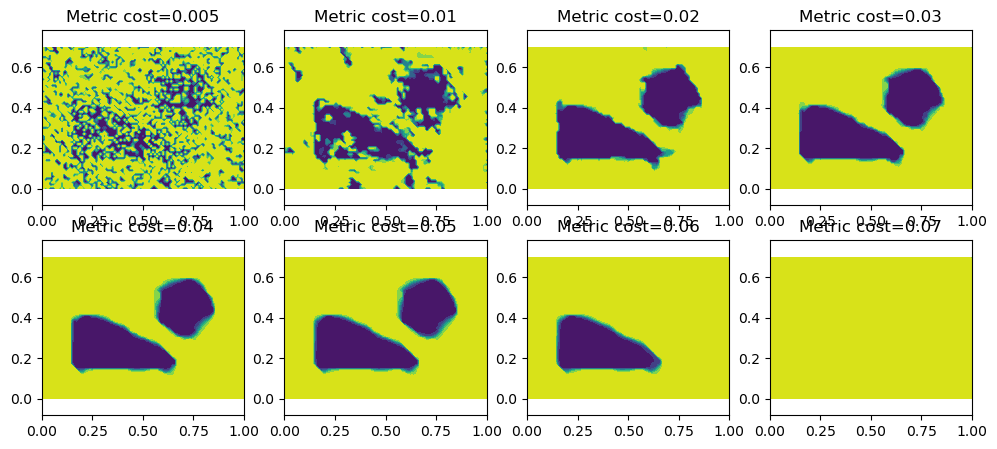

In [71]:
plt.figure(figsize=[12,5])
for i,cost in enumerate([0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07]):
    res = mincut(g_noisy,metric.with_cost(cost),dx,'gradb',verbosity=1)
    plt.subplot(2,4,1+i)
    plt.title(f"Metric {cost=}") 
    plt.axis('equal')
    plt.contourf(*Xϕ,res['ϕ'])

In [72]:
compare_cpu_gpu( (g_noisy,metric.with_cost(0.04),dx,'gradb'))

### 5.4 Randers metric

A Randers metric is defined as the sum of a Riemannian metric and of a drift term.
$$
    F_x(v) = \|v\|_{M(x)} + \<\omega(x),v\>,
$$
subject to the compatibility condition 
$$
    \|\omega\|_{M^{-1}(x)} \leq 1,
$$
which can equivalently be written as 
$$
    \begin{pmatrix}
    M &\omega\\
    \omega^\top &1
    \end{pmatrix}
    \succeq 0.
$$
Randers metrics are asymmetric when the drift term is non-zero, in the sense that $F_x(v)\neq F_x(-v)$ for some vectors $v$. 

The structure tensor $S$ naturally comes with a linear term $\eta := K_\rho * \nabla u_\sigma$, which satisfies the Randers compatibility condition.
This can be used to enhance the segmentation, since the gradient $\nabla \vp$ is naturally oriented outwards of the segmented region. 

In [73]:
# Check that Randers compatibility condition is satisfied
arr = np.array([[gxx,gxy,gx],
 [gxy,gyy,gy],
 [gx,gy,np.ones_like(gx)]])
assert np.all(lp.det(arr)>=0)

In [74]:
gmax = np.max(gxx+gyy)
S = np.array([[gxx,gxy],[gxy,gyy]]) / gmax # Normalized structure tensor
η = np.array([gx,gy])/np.sqrt(gmax) # Normalized gradient
assert np.all(lp.det(S-lp.outer_self(η))>0)

relax = 0.05*np.eye(2)[:,:,None,None] # Ensure positive definiteness
metric = Metrics.Rander(S+relax,-η).dual()

The vector $[1,2]$ is the outward normal to the long edge of the triangle. Below, we can see that as desired:
- (left) the norm of this vector is small along the edge.
- (right) the norm of the opposite vector is large along the edge.

Thus the chosen metric promotes the correct direction of normal vectors to the shape, in addition to their correct orientation and location.

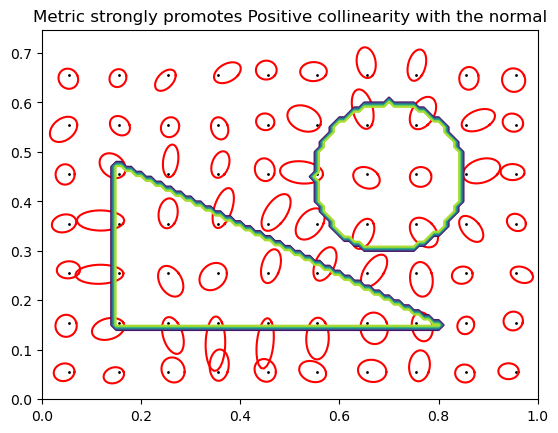

In [75]:
plt.title("Metric strongly promotes Positive collinearity with the normal")
Plotting.Tissot(metric,Xm,subsampling=10,scale=-1.8)
plt.contour(*Xϕ,g_sharp);

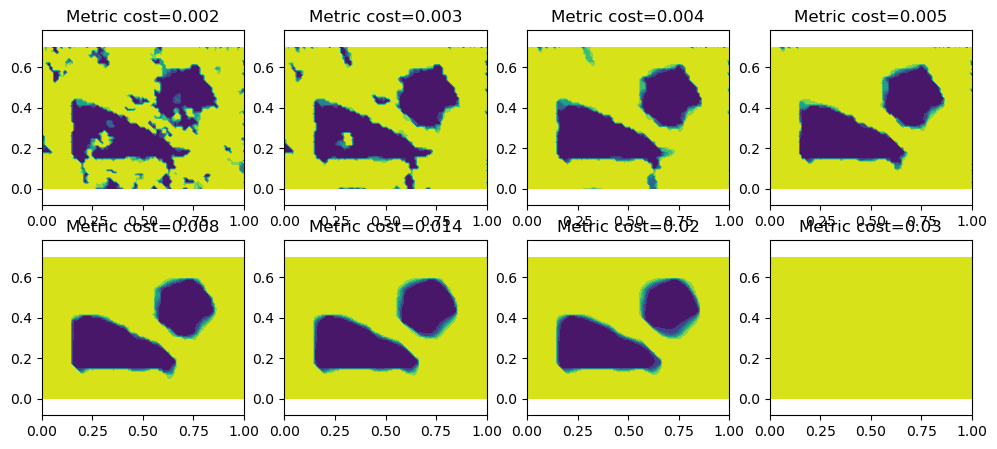

In [76]:
plt.figure(figsize=[12,5])
for i,cost in enumerate([0.002,0.003,0.004,0.005,0.008,0.014,0.02,0.03]):
    res = mincut_cpu(g_noisy,metric.with_cost(cost),dx,'gradb',verbosity=1)
    plt.subplot(2,4,1+i)
    plt.title(f"Metric {cost=}") 
    plt.axis('equal')
    plt.contourf(*Xϕ,res['ϕ'])

### 5.5 Randers metric via divergence

Randers metrics can alternatively be incorporated in the mincut problem, via to the identity 
$$
    \int_\Omega \<\omega,\nabla \vp\> = -\int_\Omega \diver(\omega) \vp,
$$
which holds with suitable boundary conditions. 

Thanks to this identity, we can incorporate the linear asymmetric term of the metric in the ground cost $g$, and rely on the Riemannian case.

In [77]:
metric_riemann = Metrics.Riemann(metric.m)
ndiv_omega = res['ops']['KT'](metric.w)

In [78]:
cost = 0.008
res_riemann = mincut_cpu(g_noisy+cost*ndiv_omega,metric_riemann.with_cost(cost),dx,'gradb')
res_randers = mincut_cpu(g_noisy,metric.with_cost(cost),dx,'gradb')

Primal-dual solver completed 101 steps in 0.15260100364685059 seconds
Primal-dual solver completed 81 steps in 0.11912918090820312 seconds


In [79]:
# The GPU implementation implicitly uses the divergence trick
compare_cpu_gpu(data_cpu=(g_noisy+cost*ndiv_omega,metric_riemann.with_cost(cost),dx,'gradb'), 
                data_gpu=(g_noisy,metric.with_cost(cost),dx,'gradb') )

The numerical results are identical, up the accuracy of the numerical solution. 

In [80]:
assert np.mean(np.abs(res_riemann['ϕ']-res_randers['ϕ'])) < 1e-3 

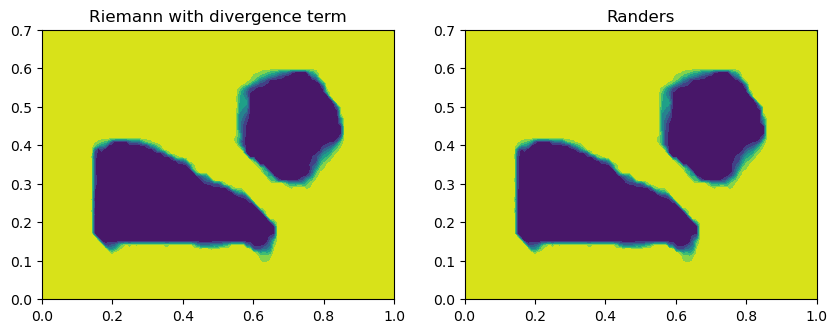

In [81]:
plt.figure(figsize=[10,3.5])
plt.subplot(1,2,1); plt.title("Riemann with divergence term")
plt.contourf(*Xϕ,res_riemann['x'])
plt.subplot(1,2,2); plt.title("Randers")
plt.contourf(*Xϕ,res_riemann['x']);

The number of iterations is similar (although not identical). Thus there is no obvious reason to choose one method over the other.

In [82]:
print(f"{res_riemann['niter']=}, {res_randers['niter']=}")

res_riemann['niter']=101, res_randers['niter']=81


If one uses the Riemannian metric without the divergence term, then the result is obviously modified. In this specific case, all information is lost.

In [83]:
res = mincut(g_noisy,metric_riemann.with_cost(cost),dx,'gradb')
assert np.mean(res['ϕ']) > 0.999 # Segmentation fails, the level set function ϕ=1 almost identically
#plt.title("Riemann without divergence term (fails)")
#plt.contourf(*Xϕ,res['ϕ']);

Primal-dual solver completed 181 steps in 0.2749629020690918 seconds


In [84]:
np.max(metric_riemann.anisotropy())

2.4254044135829993

The divergence of the Randers field tends to be positive inside the regions of interest, and negative outside, similar to the ground cost function.

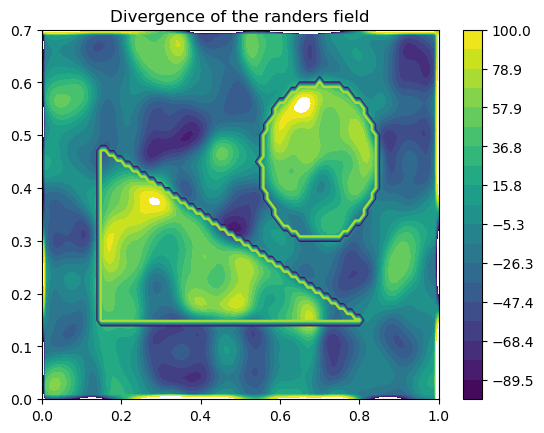

In [85]:
plt.title('Divergence of the randers field')
plt.contour(*Xϕ,g_sharp)
plt.contourf(*Xϕ,ndiv_omega,levels=np.linspace(-100,100,20))
plt.colorbar();

### 5.6 Asymmetric quadratic metrics

Asymmetric Quadratic (AQ) metrics take the form 
$$
    F_x(v) := \sqrt{ \|v\|_{M(x)}^2 + \<w(x),v\>_+^2},
$$
where $\alpha_+ := \max \{0,\alpha\}$, where $M$ must be positive definite pointwise, and $w$ is an arbitrary vector field.

They are asymmetric, similar to Randers metrics, but with a different algebraic structure. The divergence trick presented in the last section does not apply, but thankfully the projection onto their unit ball is computable.

Asymmetric quadratic metrics are more general than Riemannian metrics, and thanks to the divergence trick a Rander's like linear term can be added as well. I order to design the vector field $w$, we consider the smoothed gradient $\eta$ of the image.

**Asymmetric isotropic metrics**
They are a special case of asymmetric quadratic metrics, with the form
$$
    F_x(v) := \sqrt{ a^2\|v\|^2 + \mathrm{sign}(a)\<w(x),v\>_+^2},
$$
subject to the compatibility condition $|a|>0$ and $a^2+\mathrm{sign}(a)\|w\|^2 > 0$. 
The parameters may be a little bit more transparent, and numerical computations are slightly faster and less memory intensive. 


<!---
However, we choose to illustrate them with an enhancement of the most basic penalization, defined by the isotropic metric with constant cost.
--->

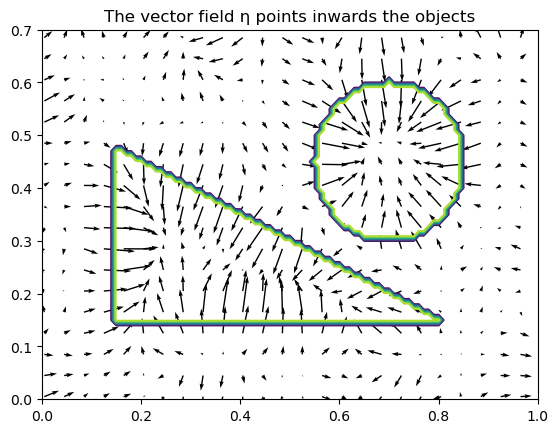

In [86]:
plt.title("The vector field η points inwards the objects")
Plotting.quiver(*Xm,*η,subsampling=[4,4])
plt.contour(*Xϕ,g_sharp);

**Isotropic metric with forbidden half space.**
We choose here the metric
$$
    F_x(v) := \sqrt{\|v\|^2 + \epsilon^{-2} \<\eta(x),v\>_+^2},
$$
which is obtained with $M := \Id$ and $w := \epsilon^{-1}\eta$.
With this choice one has $F_x(v) \approx \|v\|$ if $\<\eta(x),v\> \leq 0$, and $F_x(v) \gg \|v\|$ otherwise, in other words we recover the usual isotropic cost except that a half space of directions is forbidden.

This approach is useful if $-\eta$ is an imprecise approximation of the normal direction. 

In [87]:
from agd.Metrics.asym_iso import AsymIso
from agd.Metrics import AsymQuad

In [88]:
# AsymQuad and AsymIso implementations are equivalent
ϵ = 1e-1
#metric = AsymQuad(np.eye(2),η/ϵ)
metric = AsymIso(1.,η/ϵ)

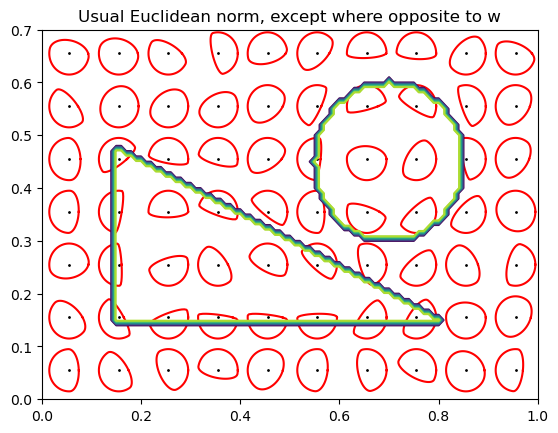

In [89]:
plt.title("Usual Euclidean norm, except where opposite to w")
Plotting.Tissot(metric,Xm,subsampling=10)
plt.contour(*Xϕ,g_sharp);

The numerical results are reminiscent of the constant metric case, with quite irregular boundaries that are not well aligned with the direction on the real object boundaries. Better results were obtained with a variable cost isotropic metric, and even better with fully anisotropic metrics, but at the cost of a more complex metric design.

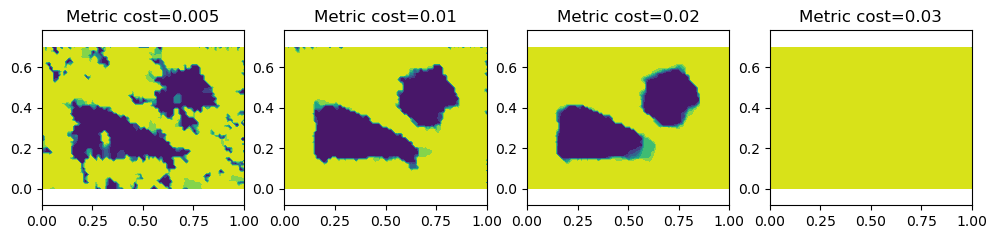

In [90]:
plt.figure(figsize=[12,5])
for i,cost in enumerate([0.005,0.01,0.02,0.03]):
    res = mincut(g_noisy,metric.with_cost(cost),dx,'gradb',verbosity=1)
    plt.subplot(2,4,1+i)
    plt.title(f"Metric {cost=}") 
    plt.axis('equal')
    plt.contourf(*Xϕ,res['ϕ'])

In [91]:
compare_cpu_gpu((g_noisy,metric.with_cost(0.02),dx,'gradb'))

On the contrary, we can choose to promote vectors which are aligned with the approximate normal $-\eta$, rather than penalize those aligned with $\eta$. There are various ways to design the parameters for that purpose. Here we use norm duality.

In [92]:
# AsymQuad and AsymIso implementations are equivalent
metric = Metrics.AsymQuad(np.eye(2),-η/ϵ).dual()
#metric = AsymIso(1.,-η/ϵ).dual()

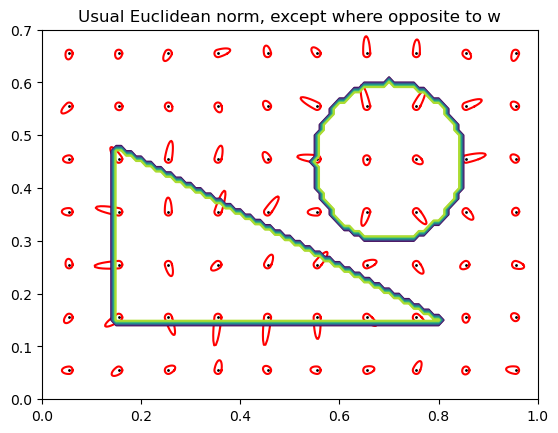

In [93]:
plt.title("Usual Euclidean norm, except where opposite to w")
Plotting.Tissot(metric,Xm,subsampling=10)
plt.contour(*Xϕ,g_sharp);

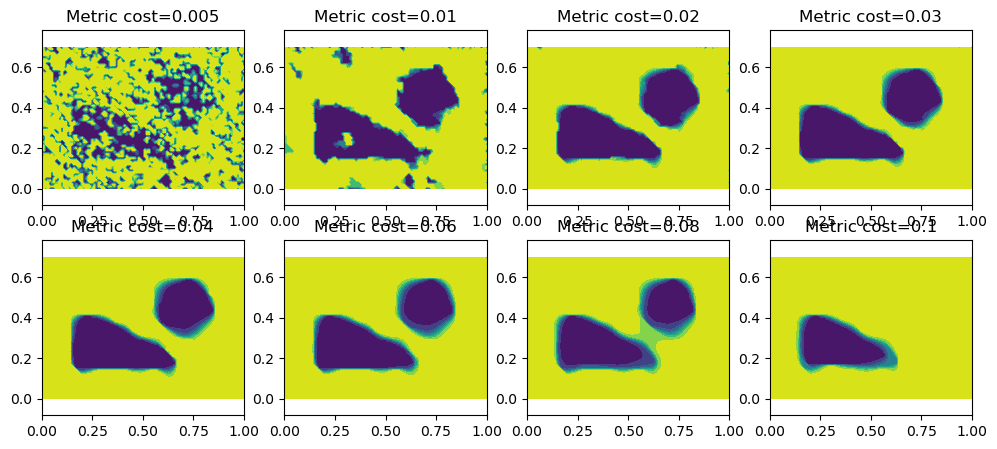

In [94]:
plt.figure(figsize=[12,5])
for i,cost in enumerate([0.005,0.01,0.02,0.03,0.04,0.06,0.08,0.1]):
    res = mincut(g_noisy,metric.with_cost(cost),dx,'gradb',verbosity=1)
    plt.subplot(2,4,1+i)
    plt.title(f"Metric {cost=}") 
    plt.axis('equal')
    plt.contourf(*Xϕ,res['ϕ'])

In [95]:
compare_cpu_gpu((g_noisy,metric.with_cost(0.02),dx,'gradb'))

In [96]:
# This code cell validates the AsymIso and AsymQuad implementations against one another
np.random.seed(42)
v = np.random.normal(size=(2,100))
a = 2.; w = [1.5,0.5];
iso0 = AsymIso(a,w); iso1 = iso0.dual()
quad0 = AsymQuad(a**2*np.eye(2),w); quad1 = quad0.dual()
for x,y in zip(iso0,iso1.dual()): assert np.allclose(x,y)

for iso,quad in ((iso0,quad0),(iso1,quad1)):
    for x,y in zip(quad,AsymQuad.from_cast(iso)): assert np.allclose(x,y)
    assert np.allclose(iso.norm(v),quad.norm(v))
    assert np.allclose(iso.gradient(v),quad.gradient(v))
    assert iso.is_definite()
    assert iso.vdim==quad.vdim
    assert iso.shape==quad.shape
    assert iso.cost_bound()<=quad0.cost_bound()
    assert np.allclose(iso.anisotropy(),quad.anisotropy())
    for x,y in zip(quad.rotate_by(np.pi/3),AsymQuad.from_cast(iso.rotate_by(np.pi/3))): assert np.allclose(x,y)
    for x,y in zip(quad.with_cost(0.5),AsymQuad.from_cast(iso.with_cost(0.5))): assert np.allclose(x,y)
    proj_iso,proj_quad = iso.make_proj_dual(),quad.make_proj_dual()
    assert np.allclose(proj_iso(v),proj_quad(v))